# Importing

In [ ]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression

Use to plot the data

In [250]:
import matplotlib.pyplot as plt


Use to make data look better

In [251]:
from matplotlib import style

Use to specify the style of the plot

In [252]:
style.use('ggplot')

# Selecting Files

In [253]:
file_path = r'D:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Project 2\Data\600873_metadata_utf8.csv'
stock_df = pd.read_csv(file_path)

# Calculating nessasary indexes
and add them to the stock_df dataframe

In [254]:
stock_df['HL_PCT'] = (stock_df['Highest Price'] - stock_df['Closing Price']) / stock_df['Closing Price'] * 100.0
stock_df['PCT_change'] = (stock_df['Closing Price'] - stock_df['Opening Price']) / stock_df['Opening Price'] * 100.0
display(stock_df.head())

,Stock Code,Stock Name,Trading Time,Opening Price,Highest Price,Lowest Price,Closing Price,Price Change,Price Change Percentage,Trading Volume,Trading Amount,HL_PCT,PCT_change
0,600873,梅花生物,2/17/1995,5.50,6.25,5.50,5.95,--,--,"11,954,900","69,198,000",5.042017,8.181818
1,600873,梅花生物,2/20/1995,5.81,5.95,5.70,5.76,-0.19,-3.1933,"3,859,200","22,417,000",3.298611,-0.860585
2,600873,梅花生物,2/21/1995,5.75,5.88,5.61,5.88,0.12,2.0833,"2,091,500","12,031,000",0.000000,2.260870
3,600873,梅花生物,2/22/1995,5.86,8.69,5.80,8.32,2.44,41.4966,"16,299,000","118,230,000",4.447115,41.979522
4,600873,梅花生物,2/23/1995,7.98,9.99,7.81,9.99,1.67,20.0721,"18,309,200","158,378,000",0.000000,25.187970


# Change the trading time into pandas datetime data type.

In [255]:
stock_df['Trading Time'] = pd.to_datetime(stock_df['Trading Time'])
print(stock_df['Trading Time'].dtype)

datetime64[ns]


# Choose data columns we want and drop the rest

In [256]:
stock_df = stock_df[['Trading Time', 'Closing Price', 'HL_PCT', 'PCT_change', 'Trading Volume']]
display(stock_df.head())

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume
0,1995-02-17,5.95,5.042017,8.181818,"11,954,900"
1,1995-02-20,5.76,3.298611,-0.860585,"3,859,200"
2,1995-02-21,5.88,0.000000,2.260870,"2,091,500"
3,1995-02-22,8.32,4.447115,41.979522,"16,299,000"
4,1995-02-23,9.99,0.000000,25.187970,"18,309,200"


Remove commas and convert to numeric, since in metadata the trading volume contain commas

In [257]:
stock_df['Trading Volume'] = stock_df['Trading Volume'].replace({',': ''}, regex=True).astype(float)
display(stock_df.head())

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume
0,1995-02-17,5.95,5.042017,8.181818,11954900.0
1,1995-02-20,5.76,3.298611,-0.860585,3859200.0
2,1995-02-21,5.88,0.000000,2.260870,2091500.0
3,1995-02-22,8.32,4.447115,41.979522,16299000.0
4,1995-02-23,9.99,0.000000,25.187970,18309200.0


# Setting up a name for target column attribute

In [258]:
forecast_col = 'Closing Price'

# Tell the code how many days ahead will it be forcasting

In [259]:
forecast_out = int(math.ceil(0.001*len(stock_df)))
print(len(stock_df), forecast_out)
# The 0.001 percentage of the data is 7 days, so we are predicting the closing price for the 7 days later

6885 7


# Managing the answers
The answer is the closing price 7(forcast_out) days later.

We then shift the data's targeted attributes up for 7 days and assign them into the 'Label' column.

In [260]:
stock_df['Label'] = stock_df[forecast_col].shift(-forecast_out)
print(forecast_out)
display(stock_df.tail(10))

7


,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
6875,2025-01-14,9.67,1.034126,0.729167,20879042.0,9.76
6876,2025-01-15,9.79,0.817160,1.240951,26232207.0,9.83
6877,2025-01-16,9.78,1.635992,-0.710660,18791900.0,10.03
6878,2025-01-17,9.82,0.712831,0.511771,17211802.0,NaN
6879,2025-01-20,9.84,1.626016,-0.505561,19425301.0,NaN
6880,2025-01-21,9.72,1.748971,-1.419878,17641072.0,NaN
6881,2025-01-22,9.78,0.204499,1.033058,15627117.0,NaN
6882,2025-01-23,9.76,1.639344,-0.712106,11882532.0,NaN
6883,2025-01-24,9.83,0.305188,0.820513,15612997.0,NaN
6884,2025-01-27,10.03,0.897308,1.930894,19881690.0,NaN


# Spliting and Managing the features

Split the dataframe where X is the features and y is the answer

1. Remove answer(label) from X which is the features
2. Scale the features.
3. Store remoced answers into y
4. drop NaN values created by the shifting, since shift up will create a 7 days of label section NaN values, so make sure to drop these when you create 'Label' column. 
5. By doing these following two blocks, you split the original data into 4 parts: 

   1. (original days - forcast_out days)'s data without answers: `X`
   2. (original days - forcast_out days)'s answers without data: `y`
   3. (forcast_out days)'s data without answers: `X_lately`
stock_df.dropna(inplace = True)
   1. (forcast_out days)'s answers which are NaN values because of the shifting, and is removed by the `stock_df.dropna(inplace = True)` line following.

In [261]:
dates = stock_df['Trading Time'][:-forecast_out]
dates_lately = stock_df['Trading Time'][-forecast_out:]

display(dates)
display(dates_lately)

0      1995-02-17
1      1995-02-20
2      1995-02-21
3      1995-02-22
4      1995-02-23
          ...    
6873   2025-01-10
6874   2025-01-13
6875   2025-01-14
6876   2025-01-15
6877   2025-01-16
Name: Trading Time, Length: 6878, dtype: datetime64[ns]

6878   2025-01-17
6879   2025-01-20
6880   2025-01-21
6881   2025-01-22
6882   2025-01-23
6883   2025-01-24
6884   2025-01-27
Name: Trading Time, dtype: datetime64[ns]

In [262]:
X = np.array(stock_df.drop(['Label', 'Trading Time'], axis = 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

# display(X)
# display(X_lately)
# display(stock_df.tail(10))

## Removing NaN values caused by the shifting

In [263]:
stock_df.dropna(inplace = True)

In [264]:
y = np.array(stock_df['Label'])
display(y)
display(stock_df.tail(10))

array([ 8.1 ,  8.23,  8.18, ...,  9.76,  9.83, 10.03], shape=(6878,))

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
6868,2025-01-03,9.83,2.950153,-0.807265,26463900.0,9.67
6869,2025-01-06,9.89,1.314459,0.406091,23598802.0,9.79
6870,2025-01-07,9.81,1.630989,-0.808898,24758020.0,9.78
6871,2025-01-08,9.71,1.132853,-0.512295,33416543.0,9.82
6872,2025-01-09,9.58,1.670146,-0.519211,19952842.0,9.84
6873,2025-01-10,9.44,1.800847,-1.666667,14697048.0,9.72
6874,2025-01-13,9.61,0.416233,2.125399,25370178.0,9.78
6875,2025-01-14,9.67,1.034126,0.729167,20879042.0,9.76
6876,2025-01-15,9.79,0.817160,1.240951,26232207.0,9.83
6877,2025-01-16,9.78,1.635992,-0.710660,18791900.0,10.03


You can see they have the same shape in axis = 1.

# Split data into traning and testing.

Set shuffle = False because by default it will shuffle and this will mess up the date relationships which is something we want

In [265]:
X_train, X_test, y_train, y_test, dates_train, dates_test = model_selection.train_test_split(X, y, dates, test_size = 0.2)

# Training the model(classifier)
`n_jobs = -1` means to run using as many threads as possible, make it faster.

In [266]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

# Getting the prediction for the shifted days that has no answers.
And print the result:

In [267]:
forecast_set = clf.predict(X_lately)
print("Forecast result: " + str(forecast_set) + "\n" + "With the accuracy of: " + str(accuracy) + "\n" + "Forecast out of " + str(forecast_out) + " days.")

Forecast result: [9.65444882 9.55106751 9.43582859 9.53986004 9.62128672 9.72318729
 9.7478436 ]
With the accuracy of: 0.9697570800369313
Forecast out of 7 days.


# Merging all sections together for matplot lib

1. dates_train
2. dates_test
3. dates_lately

This being the X axis

and


1. y_train
2. y_test
3. forcast out

This being the Y axis

In [268]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
forecast_set = forecast_set.reshape(-1, 1)

dates_train = np.array(dates_train).reshape(-1, 1)
dates_test  = np.array(dates_test).reshape(-1, 1)
dates_lately = np.array(dates_lately).reshape(-1, 1)

all_dates = np.vstack((dates_train, dates_test, dates_lately)).flatten()
all_targets = np.vstack((y_train, y_test, forecast_set)).flatten()

df_combined = pd.DataFrame({
    "Date": all_dates,
    "Closing Price": all_targets
})

df_combined.set_index('Date', inplace = True)
df_combined.sort_values(by = 'Date', inplace = True)
display(df_combined)


,Closing Price
Date,
1995-02-17,8.100000
1995-02-20,8.230000
1995-02-21,8.180000
1995-02-22,8.900000
1995-02-23,10.530000
...,...
2025-01-21,9.435829
2025-01-22,9.539860
2025-01-23,9.621287


## Using matplotlib to Show the graph

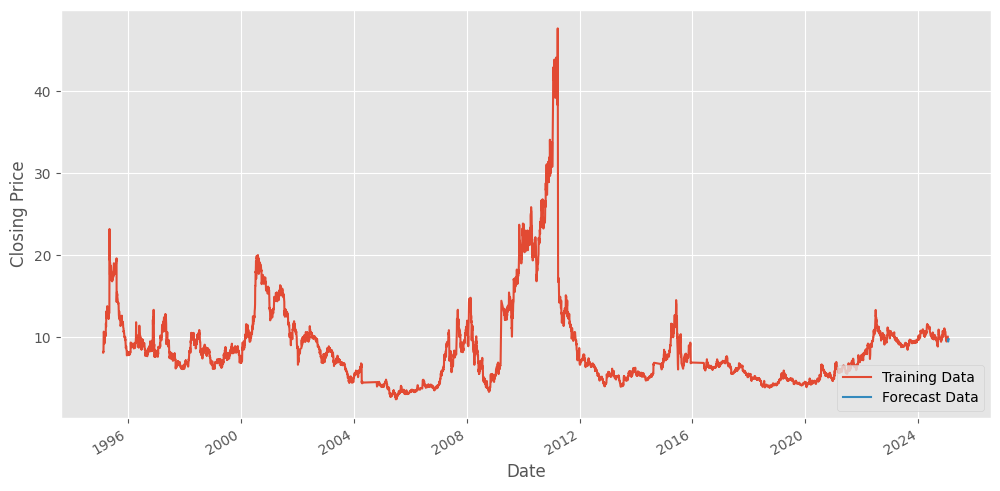

In [269]:
plt.figure(figsize = (12, 6))
df_combined['Closing Price'][:-forecast_out].plot(label = 'Training Data')
df_combined['Closing Price'][-forecast_out:].plot(label = 'Forecast Data')
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [270]:
df_combined.info()
df_combined.columns
df_combined.describe()
df_combined.sort_values(by = 'Closing Price', ascending = False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6885 entries, 1995-02-17 to 2025-01-27
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  6885 non-null   float64
dtypes: float64(1)
memory usage: 107.6 KB


,Closing Price
Date,
2011-03-25,47.67
2011-03-03,44.10
2011-02-10,43.86
2011-02-28,43.83
2011-03-24,43.82
...,...
2005-07-12,2.48
2005-07-01,2.47
2005-07-08,2.44
